In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('categorized_particles.csv')

In [8]:
df2 = pd.read_csv('fiber.csv')

In [9]:
df3 = pd.read_csv('air_bubble_and_fiber.csv')

In [16]:
df.shape

(114708, 22)

In [166]:
#df.head()

In [164]:
types=df['type'].unique()
grouped_type=df.groupby("type")

list1=[]

for i in range(11):
    list1.append(grouped_type.get_group(types[i]))

for idx, name in enumerate(types):
    for i in range(11):
        list1.append(grouped_type.get_group(types[i]))
    print("number of", name , "=", list1[idx].shape[0])

number of schlieren lines = 1675
number of translucent fibral = 4622
number of glass = 4959
number of dense globular = 41657
number of protein = 367
number of silicone oil = 58169
number of multi si oil = 3085
number of silicone oil agg. = 40
number of dense fibral = 59
number of dense ring-like = 30
number of translucent ring-like = 31
number of translucent globular = 1675


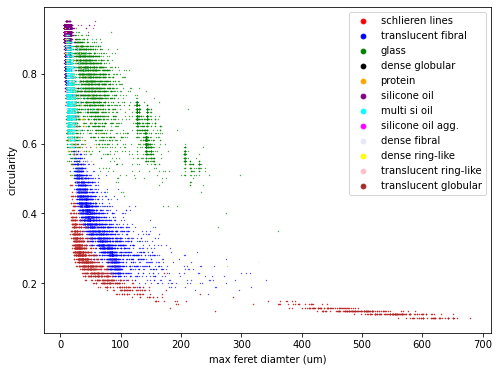

In [167]:


fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,1,1)

colors=['red','blue','green','k','orange','purple','cyan','magenta','lavender','yellow','pink','brown']

#want to replace this for loop with a function that can be input with any number of particle names or indexes

for i in range(len(types)):
    ax1.scatter(list1[i]['max_feret_diam_um'], list1[i]['circularity'], s=0.1, color = colors[i], label=types[i])

ax1.set_xlabel('max feret diamter (um)')
ax1.set_ylabel('circularity')

legend=plt.legend(markerscale=15)

plt.show()

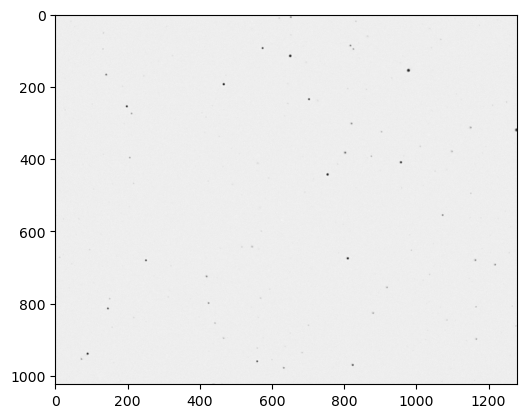

In [24]:
from skimage import io
import skimage.color

# import and read image
img = io.imread("04_Silicon_Oil_Image_00001.jpg")

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(img, cmap="gray")

In [25]:
#for Lilly's cropping code

x_left=df['x_left']
x_right=df['x_right']
y_top=df['y_top']
y_bottom=df['y_bottom']


string="04 Silicon Oil" #change these for each picture
frame=1 #corresponds to the 00001 or 00003 etc number

#print(np.where(df['frame_num']==1))
idx=np.where((df["step"].str.startswith(string)) & (df["frame_num"]==frame))
index=idx[0]
print(index)

xL=x_left[index]
xR=x_right[index]
yT=y_top[index]
yB=y_bottom[index] #finds your coordinates
print("xL =",xL)

[1681]
xL = 1681    974
Name: x_left, dtype: int64


index in csv= 1682
xL = 974


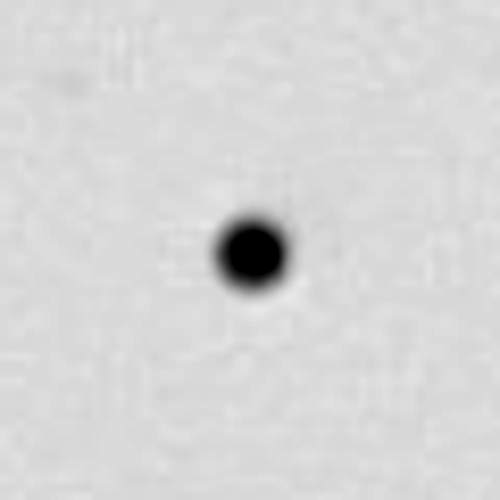

974 984 150 161


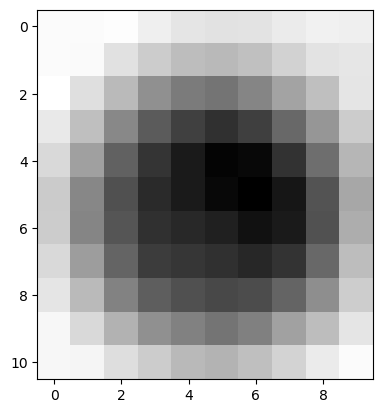

In [26]:
import matplotlib.pyplot as plt

#from PIL import Image
#im = Image.open("04_Silicon_Oil_image_00001.jpg")

                                       
#import imageio.v3 as iio
from skimage import io
import skimage.color
from PIL import Image, ImageEnhance

x_left=df['x_left']
x_right=df['x_right']
y_top=df['y_top']
y_bottom=df['y_bottom']


string="04 Silicon Oil" #change these for each picture
frame=1 #corresponds to the 00001 or 00003 etc number

#print(np.where(df['frame_num']==1))
idx=np.where((df["step"].str.startswith(string)) & (df["frame_num"]==frame)) #tuple
index=idx[0] #array, take first value of tuple
index_val=index[0] #take first value of array
print("index in csv=",index_val+1) #python starts at zero and csv starts at one so off by 1

#row=df[index, axis=1] #pull out entire row at index with largest ecd
#look into .loc and .iloc

xL=x_left[index_val] #
xR=x_right[index_val]
yT=y_top[index_val]
yB=y_bottom[index_val] #finds your coordinates
print("xL =",xL)


img=Image.open("04_Silicon_Oil_Image_00001.jpg")
img2=img.crop((xL-25,yT-25,xR+25,yB+25))
img2=img2.resize((500,500))


#image brightness enhancer
enhancer = ImageEnhance.Contrast(img2)

#factor = 1 #gives original image
#im_output = enhancer.enhance(factor)
#im_output.save('original-image.png')

#factor = 0.5 #decrease constrast
#im_output = enhancer.enhance(factor)
#im_output.save('less-contrast-image.png')

factor = 1.8 #increase contrast
img2_output = enhancer.enhance(factor)

display(img2_output)

# import and read image
img = io.imread("04_Silicon_Oil_Image_00001.jpg")
cropped = img[yT:yB,xL:xR]
#img[img < 128] = 0

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(cropped, cmap="gray")
print(xL,xR,yT,yB)

[3]


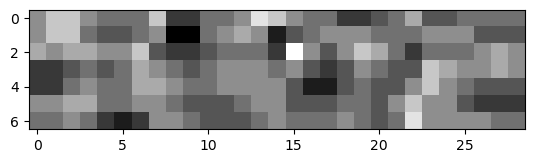

In [27]:
                                       
#import imageio.v3 as iio
from skimage import io
import skimage.color


string="11 Fiber" #change these for each picture
frame=5 #corresponds to the 00001 or 00003 etc number

#print(np.where(df['frame_num']==1))
idx=np.where((df2["step"].str.startswith(string)) & (df2["frame_num"]==frame))
index=idx[0]
print(index)


xL=x_left[3]
xR=x_right[3]
yT=y_top[3]
yB=y_bottom[3] #finds your coordinates

# import and read image
img = io.imread("11 Fiber_5200-3196_191021-10271 Image_00005.jpg")
cropped = img[yT:yB,xL:xR]
#img[img < 128] = 0

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(cropped, cmap="gray")


ecd = 142.125 microns
csv index = 96478


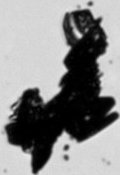

largest ecd (glass particle)


In [28]:
from skimage import io
import skimage.color
from PIL import Image

max_ecd=np.max(df["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd))  
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)

ind=96477

xL=df.iloc[ind]['x_left']
xR=df.iloc[ind]['x_right']
yT=df.iloc[ind]['y_top']
yB=df.iloc[ind]['y_bottom']

img=Image.open("09 Glass Image_00299.jpg")
img2=img.crop((xL,yT,xR,yB))
display(img2)

print("largest ecd (glass particle)")

ecd = 81.875 microns
csv index = 66618


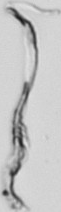

largest ecd (Protein)


In [29]:
#largest ecd protein
from skimage import io
import skimage.color
from PIL import Image
import numpy as np

max_ecd=np.max(protein["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd))  
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("08_Vial4_Protein_Image_01322.jpg")
img2=img.crop((xL,yT,xR,yB))
display(img2)

print("largest ecd (Protein)")

ecd = 61.625 microns
csv index = 64842


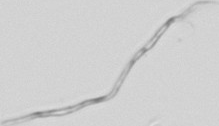

largest ecd (Dense Fibral)


In [36]:
#largest ecd dense fibral 

max_ecd=np.max(dense_fibral["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("dense")) & (df["type"].str.endswith("fibral")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Vial3_Dense_Fibral_00111.jpg")
img2=img.crop((xL,yT,xR,yB))
display(img2)

print("largest ecd (Dense Fibral)")

ecd = 73.875 microns
csv index = 247


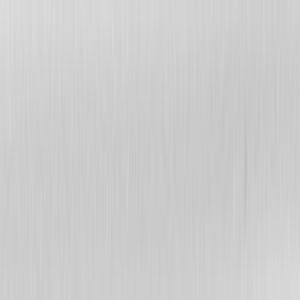

largest ecd (Schlieren Lines)


In [40]:
#largest ecd Schlieren lines

max_ecd=np.max(schlieren["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("schlieren")) & (df["type"].str.endswith("lines")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("25_Shlieren_Lines_Image_00046.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Schlieren Lines)")

ecd = 28.875 microns
csv index = 63944


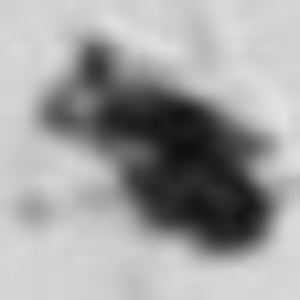

largest ecd (Desnse Globular)


In [41]:
#largest dense globular

max_ecd=np.max(dense_glob["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("dense")) & (df["type"].str.endswith("globular")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("06_Vial2_Dense_Globular_00565.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Desnse Globular)")

ecd = 47.375 microns
csv index = 24119


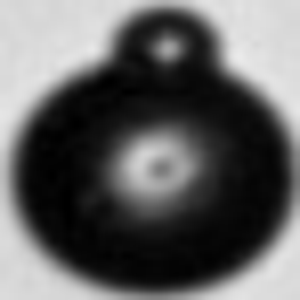

largest ecd (Multi Silicone Oil)


In [42]:
#largest multi si oil

max_ecd=np.max(multi_si_oil["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("multi")) & (df["type"].str.endswith("oil")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Multi_Silicone_Oil_Image_01036.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Multi Silicone Oil)")

ecd = 22.375 microns
csv index = 65179


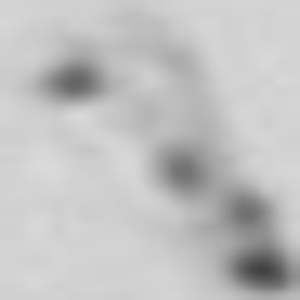

largest ecd (Silicone Oil Agg.)


In [43]:
#largest silicone oil agg

max_ecd=np.max(silicone_agg["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("silicone")) & (df["type"].str.endswith("agg.")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Silicone_Oil_Agg_Image_00798.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Silicone Oil Agg.)")

ecd = 28.625 microns
csv index = 64837


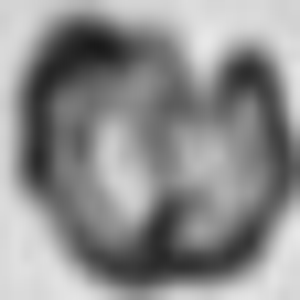

largest ecd (Dense ring-like)


In [44]:
#largest Dense ring-like
max_ecd=np.max(dense_ring["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("dense")) & (df["type"].str.endswith("ring-like")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Dense_Ring-Like_Image_00099.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Dense ring-like)")

ecd = 75.375 microns
csv index = 65763


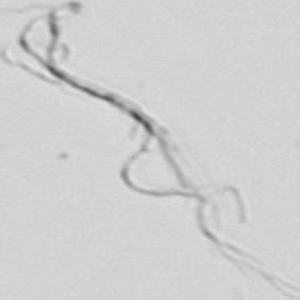

largest ecd (Translucent Fibral)


In [45]:
#largest Traslucent Fibral

max_ecd=np.max(translucent_fibral["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("trans")) & (df["type"].str.endswith("fibral")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Vial3_Translucent_Fibral_01986.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Translucent Fibral)")

In [25]:
'''
from PIL import Image

#img = Image.open(path)	
# On successful execution of this statement, an object of Image type is returned and stored in img variable)
im = Image.open('withmed.jpg')
im.show('image',img)

filename = ""
with Image.open(filename) as image:
	width, height = image.size
#Image.size gives a 2-tuple and the width, height can be obtained

df = pd.read_csv('KBI Image')
ImageFolder = KBI Image
ProteinImages = []
SchlerenImages = []
AirbubbleImages = []
FiberImages = []
Other = []

for filename in ImageFolder:
    if filename.startswith('Protein'):
        ProteinImages.append(filename)
    elif filename.startswith('Schleren'):
        SchlerenImages.append(filename)
    elif filename.startswith('0')
        SiliconImages.append(filename)
    elif filename.startswith('Air')
        AirbubbleImages.append(filename)
    elif filename.startswith('fiber')
        FiberImages.append(filename)
    else:
        other.append(filename)
'''

'\nfrom PIL import Image\n\n#img = Image.open(path)\t\n# On successful execution of this statement, an object of Image type is returned and stored in img variable)\nim = Image.open(\'withmed.jpg\')\nim.show(\'image\',img)\n\nfilename = ""\nwith Image.open(filename) as image:\n\twidth, height = image.size\n#Image.size gives a 2-tuple and the width, height can be obtained\n\ndf = pd.read_csv(\'KBI Image\')\nImageFolder = KBI Image\nProteinImages = []\nSchlerenImages = []\nAirbubbleImages = []\nFiberImages = []\nOther = []\n\nfor filename in ImageFolder:\n    if filename.startswith(\'Protein\'):\n        ProteinImages.append(filename)\n    elif filename.startswith(\'Schleren\'):\n        SchlerenImages.append(filename)\n    elif filename.startswith(\'0\')\n        SiliconImages.append(filename)\n    elif filename.startswith(\'Air\')\n        AirbubbleImages.append(filename)\n    elif filename.startswith(\'fiber\')\n        FiberImages.append(filename)\n    else:\n        other.append(file

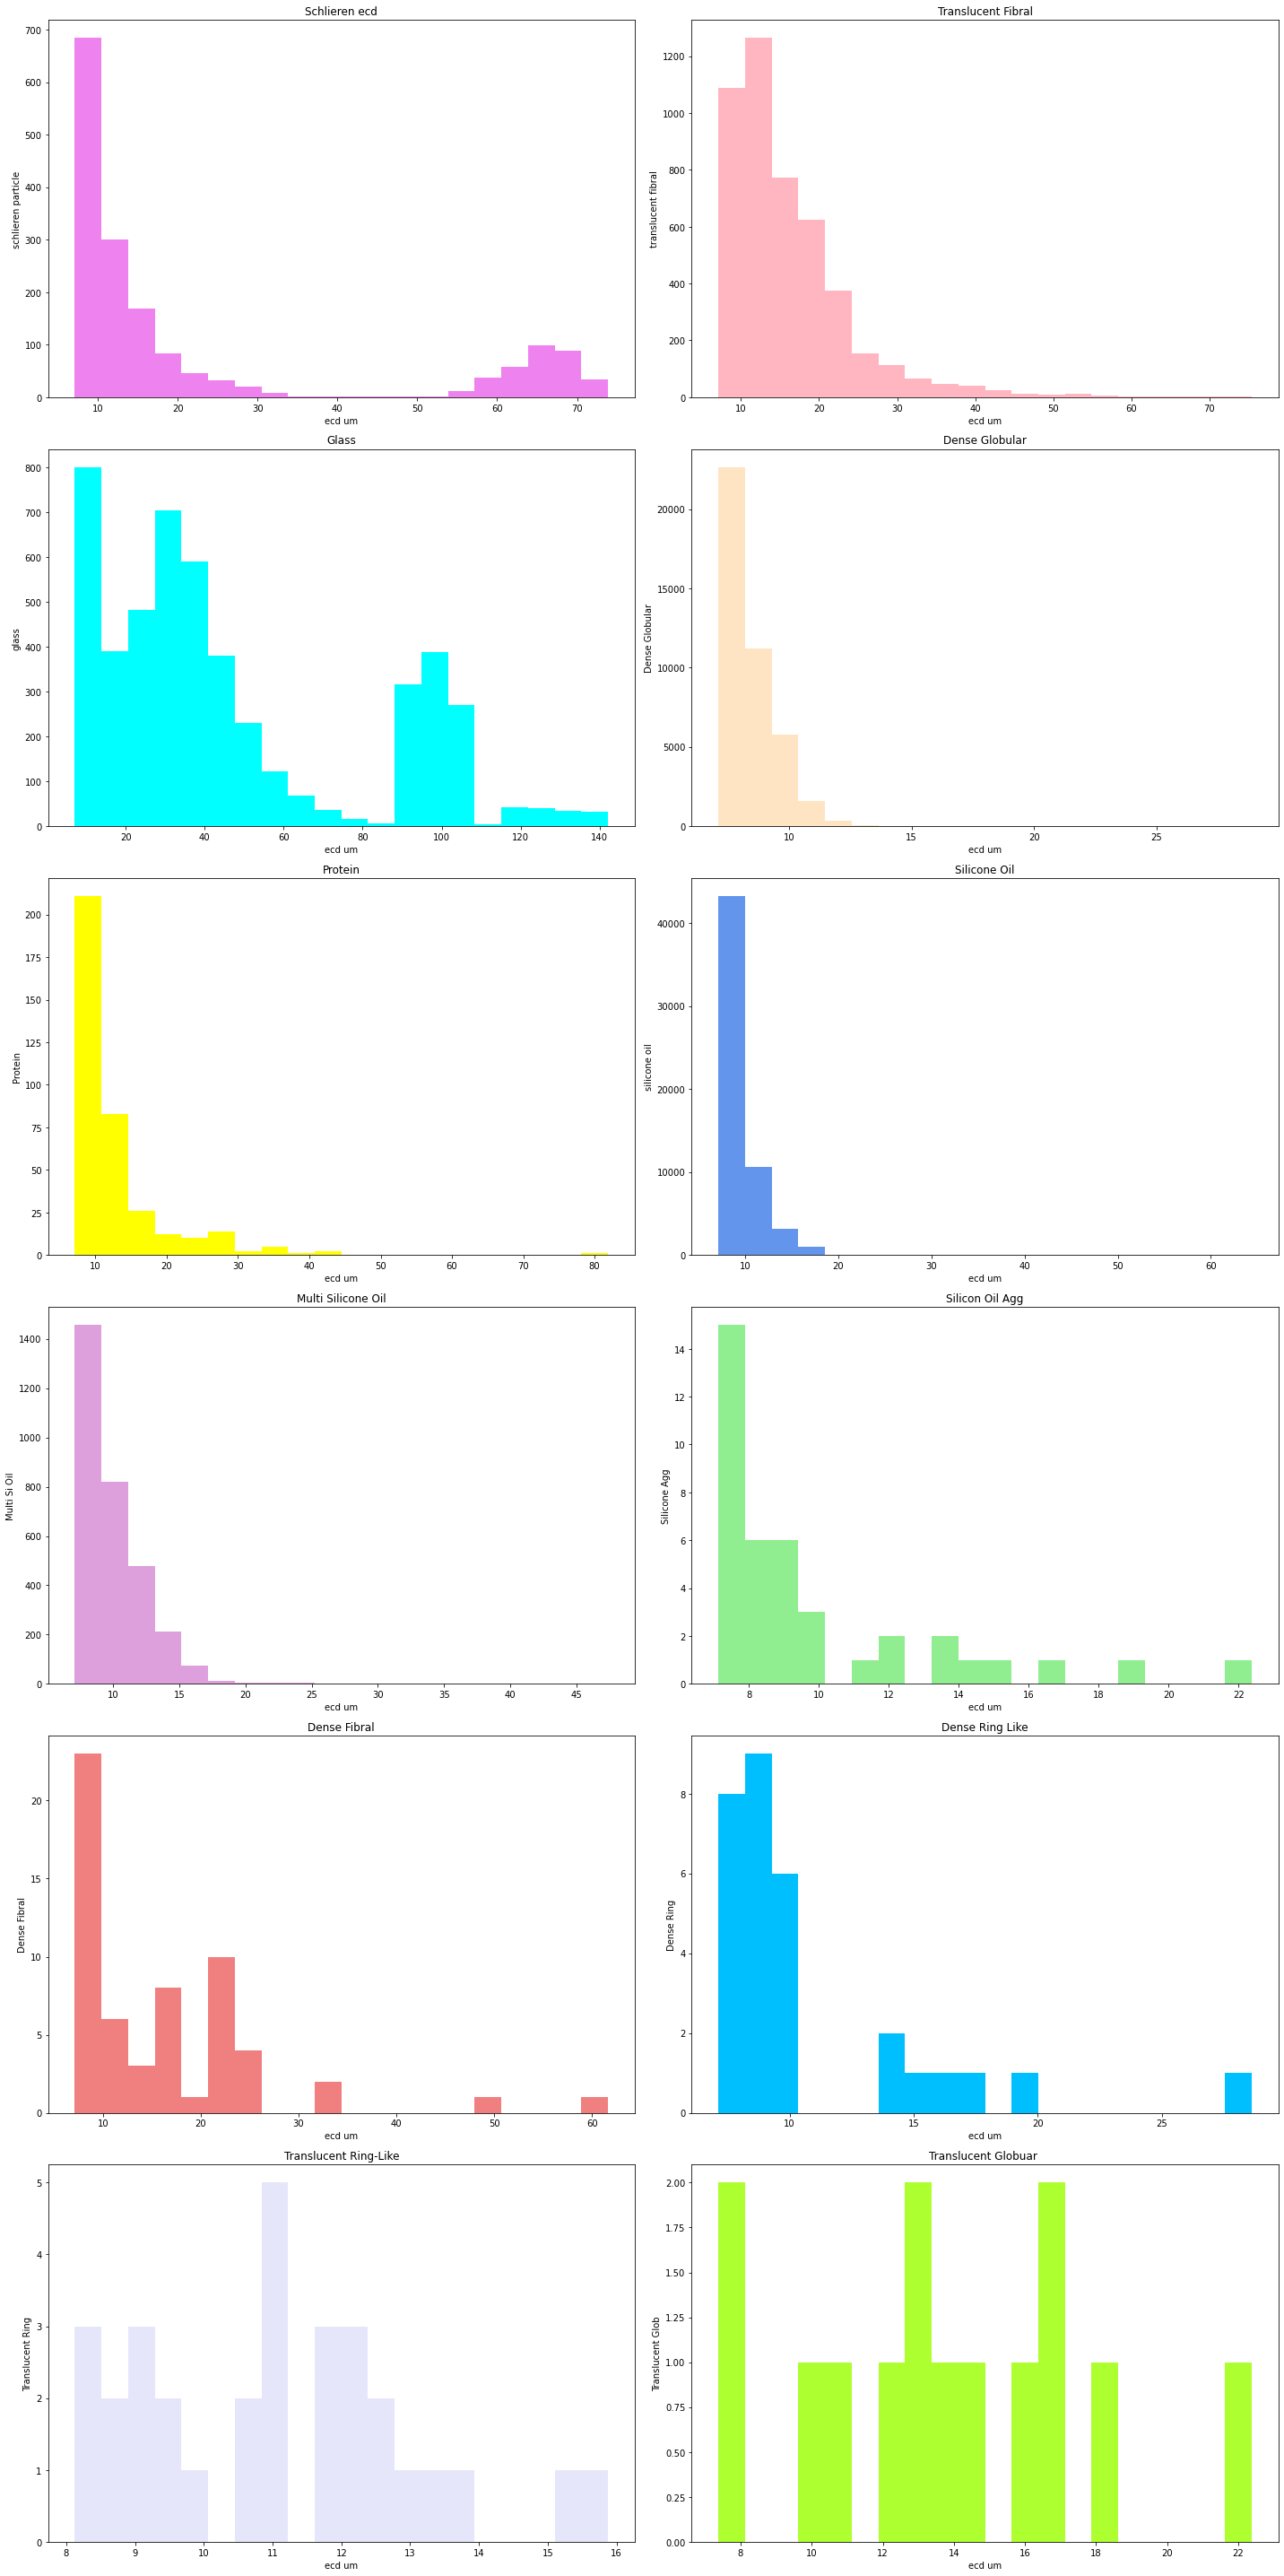

In [26]:
fig = plt.figure(figsize=(20, 40))

axes1 = fig.add_subplot(6, 2, 1) #row, column, which plot
axes2 = fig.add_subplot(6, 2, 2)
axes3 = fig.add_subplot(6, 2, 3)
axes4 = fig.add_subplot(6, 2, 4)
axes5 = fig.add_subplot(6, 2, 5)
axes6 = fig.add_subplot(6, 2, 6)
axes7 = fig.add_subplot(6, 2, 7)
axes8 = fig.add_subplot(6, 2, 8)
axes9 = fig.add_subplot(6, 2, 9)
axes10 = fig.add_subplot(6, 2, 10)
axes11 = fig.add_subplot(6, 2, 11)
axes12 = fig.add_subplot(6, 2, 12)



axes1.set_xlabel('ecd um')
axes1.set_ylabel('schlieren particle')
axes1.hist(schlieren['ecd_um'], bins = 20, color = "violet")

axes2.set_xlabel('ecd um')
axes2.set_ylabel('translucent fibral')
axes2.hist(translucent_fibral['ecd_um'], bins = 20, color = "lightpink")

axes3.set_xlabel('ecd um')
axes3.set_ylabel('glass')
axes3.hist(glass['ecd_um'], bins = 20, color = "cyan")

axes4.set_xlabel('ecd um')
axes4.set_ylabel('Dense Globular')
axes4.hist(dense_glob['ecd_um'], bins = 20, color = "bisque")

axes5.set_xlabel('ecd um')
axes5.set_ylabel('Protein')
axes5.hist(protein['ecd_um'], bins = 20, color = "yellow")

axes6.set_xlabel('ecd um')
axes6.set_ylabel('silicone oil')
axes6.hist(silicone_oil['ecd_um'], bins = 20, color = "cornflowerblue")

axes7.set_xlabel('ecd um')
axes7.set_ylabel('Multi Si Oil')
axes7.hist(multi_si_oil['ecd_um'], bins = 20, color = "plum")

axes8.set_xlabel('ecd um')
axes8.set_ylabel('Silicone Agg')
axes8.hist(silicone_agg['ecd_um'], bins = 20, color = "lightgreen")

axes9.set_xlabel('ecd um')
axes9.set_ylabel('Dense Fibral')
axes9.hist(dense_fibral['ecd_um'], bins = 20, color = "lightcoral")

axes10.set_xlabel('ecd um')
axes10.set_ylabel('Dense Ring')
axes10.hist(dense_ring['ecd_um'], bins = 20, color = "deepskyblue")

axes11.set_xlabel('ecd um')
axes11.set_ylabel('Translucent Ring')
axes11.hist(translucent_ring['ecd_um'], bins = 20, color = "lavender")

axes12.set_xlabel('ecd um')
axes12.set_ylabel('Translucent Glob')
axes12.hist(translucent_glob['ecd_um'], bins = 20, color = "greenyellow")

axes1.title.set_text('Schlieren ecd')
axes2.title.set_text('Translucent Fibral')
axes3.title.set_text('Glass')
axes4.title.set_text('Dense Globular')
axes5.title.set_text('Protein')
axes6.title.set_text('Silicone Oil')
axes7.title.set_text('Multi Silicone Oil')
axes8.title.set_text('Silicon Oil Agg')
axes9.title.set_text('Dense Fibral')
axes10.title.set_text('Dense Ring Like')
axes11.title.set_text('Translucent Ring-Like')
axes12.title.set_text('Translucent Globuar ')

fig.tight_layout() #helps clean things up and for the white space 

plt.show()

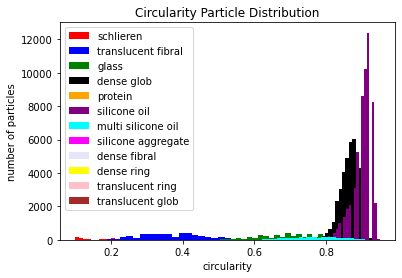

In [27]:

n_bins = 40
plt.xlabel('circularity')
plt.ylabel('number of particles')
plt.title('Circularity Particle Distribution')

plt.hist(schlieren['circularity'], n_bins, color = 'r', label="schlieren")
plt.hist(translucent_fibral['circularity'], n_bins, color = 'b', label="translucent fibral")
plt.hist(glass['circularity'], n_bins, color = 'g', label="glass")
plt.hist(dense_glob['circularity'], n_bins, color = 'k', label="dense glob")
plt.hist(protein['circularity'], n_bins, color = 'orange', label="protein")
plt.hist(silicone_oil['circularity'], n_bins, color = 'purple', label="silicone oil")
plt.hist(multi_si_oil['circularity'], n_bins, color = 'cyan', label="multi silicone oil")
plt.hist(silicone_agg['circularity'], n_bins, color = 'magenta', label="silicone aggregate")
plt.hist(dense_fibral['circularity'], n_bins, color = 'lavender', label="dense fibral")
plt.hist(dense_ring['circularity'], n_bins, color = 'yellow', label="dense ring")
plt.hist(translucent_ring['circularity'], n_bins, color = 'pink', label="translucent ring")
plt.hist(translucent_glob['circularity'], n_bins, color = 'brown', label="translucent glob")

plt.legend()


(array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 2., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([ 83.   ,  89.975,  96.95 , 103.925, 110.9  , 117.875, 124.85 ,
        131.825, 138.8  , 145.775, 152.75 , 159.725, 166.7  , 173.675,
        180.65 , 187.625, 194.6  , 201.575, 208.55 , 215.525, 222.5  ,
        229.475, 236.45 , 243.425, 250.4  , 257.375, 264.35 , 271.325,
        278.3  , 285.275, 292.25 , 299.225, 306.2  , 313.175, 320.15 ,
        327.125, 334.1  , 341.075, 348.05 , 355.025, 362.   ]),
 <BarContainer object of 40 artists>)

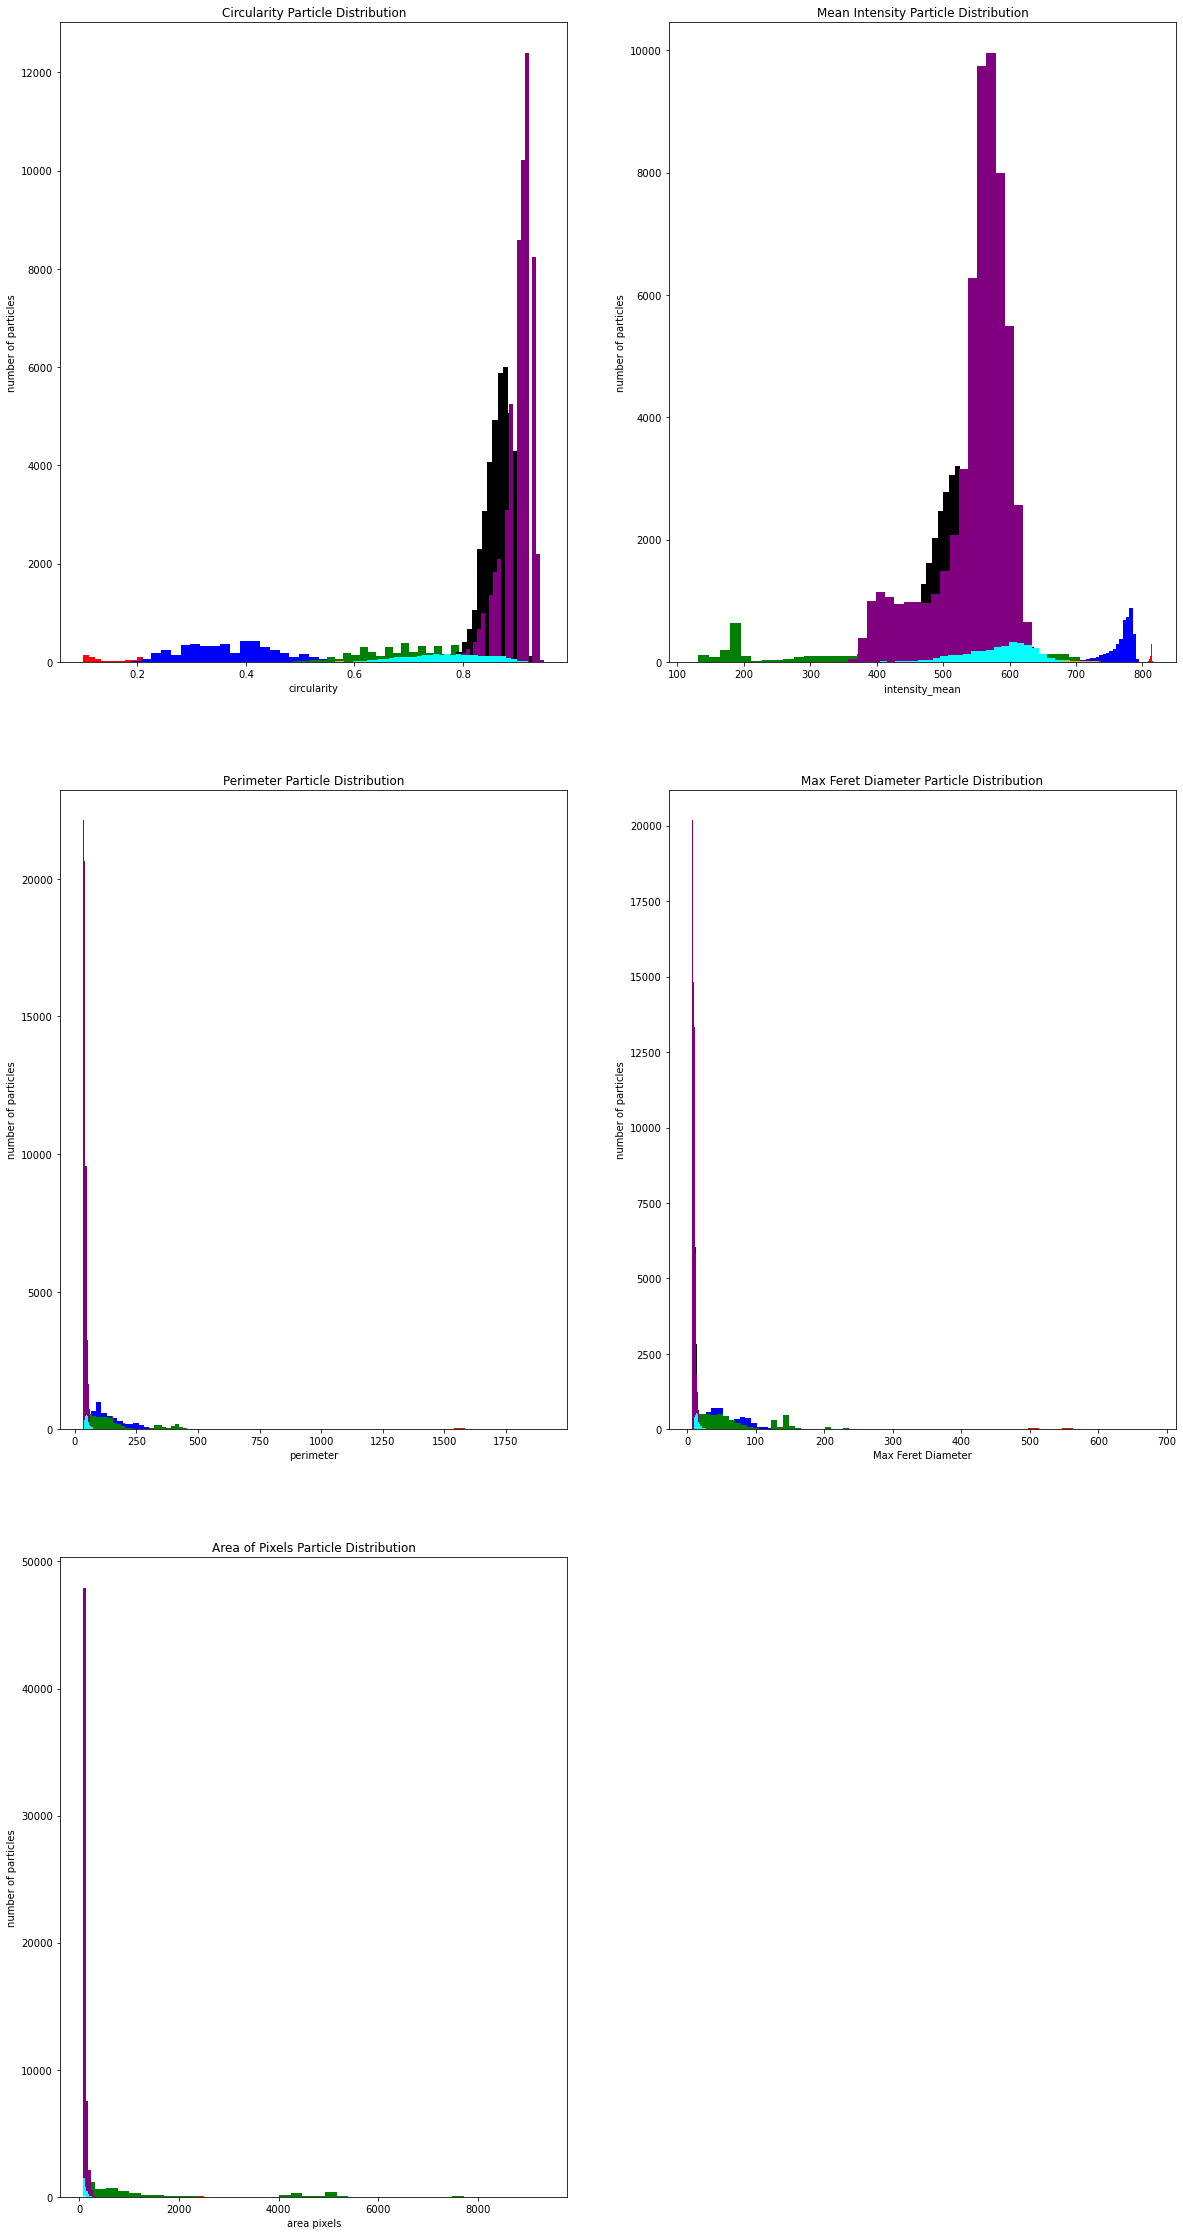

In [29]:
fig=plt.figure(figsize=(20,40))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
# ax6=fig.add_subplot(3,2,6)

n_bins = 40

ax1.set_title('Circularity Particle Distribution')
ax1.set_xlabel('circularity')
ax1.set_ylabel('number of particles')
ax1.hist(schlieren['circularity'], n_bins, color = 'r', label="schlieren")
ax1.hist(translucent_fibral['circularity'], n_bins, color = 'b', label="translucent fibral")
ax1.hist(glass['circularity'], n_bins, color = 'g', label="glass")
ax1.hist(dense_glob['circularity'], n_bins, color = 'k', label="dense glob")
ax1.hist(protein['circularity'], n_bins, color = 'orange', label="protein")
ax1.hist(silicone_oil['circularity'], n_bins, color = 'purple', label="silicone oil")
ax1.hist(multi_si_oil['circularity'], n_bins, color = 'cyan', label="multi silicone oil")
ax1.hist(silicone_agg['circularity'], n_bins, color = 'magenta', label="silicone aggregate")
ax1.hist(dense_fibral['circularity'], n_bins, color = 'lavender', label="dense fibral")
ax1.hist(dense_ring['circularity'], n_bins, color = 'yellow', label="dense ring")
ax1.hist(translucent_ring['circularity'], n_bins, color = 'pink', label="translucent ring")
ax1.hist(translucent_glob['circularity'], n_bins, color = 'brown', label="translucent glob")

ax2.set_title('Mean Intensity Particle Distribution')
ax2.set_xlabel('intensity_mean')
ax2.set_ylabel('number of particles')
ax2.hist(schlieren['intensity_mean'], n_bins, color = 'r', label="schlieren")
ax2.hist(translucent_fibral['intensity_mean'], n_bins, color = 'b', label="translucent fibral")
ax2.hist(glass['intensity_mean'], n_bins, color = 'g', label="glass")
ax2.hist(dense_glob['intensity_mean'], n_bins, color = 'k', label="dense glob")
ax2.hist(protein['intensity_mean'], n_bins, color = 'orange', label="protein")
ax2.hist(silicone_oil['intensity_mean'], n_bins, color = 'purple', label="silicone oil")
ax2.hist(multi_si_oil['intensity_mean'], n_bins, color = 'cyan', label="multi silicone oil")
ax2.hist(silicone_agg['intensity_mean'], n_bins, color = 'magenta', label="silicone aggregate")
ax2.hist(dense_fibral['intensity_mean'], n_bins, color = 'lavender', label="dense fibral")
ax2.hist(dense_ring['intensity_mean'], n_bins, color = 'yellow', label="dense ring")
ax2.hist(translucent_ring['intensity_mean'], n_bins, color = 'pink', label="translucent ring")
ax2.hist(translucent_glob['intensity_mean'], n_bins, color = 'brown', label="translucent glob")

ax3.set_title('Perimeter Particle Distribution')
ax3.set_xlabel('perimeter')
ax3.set_ylabel('number of particles')
ax3.hist(schlieren['perimeter'], n_bins, color = 'r', label="schlieren")
ax3.hist(translucent_fibral['perimeter'], n_bins, color = 'b', label="translucent fibral")
ax3.hist(glass['perimeter'], n_bins, color = 'g', label="glass")
ax3.hist(dense_glob['perimeter'], n_bins, color = 'k', label="dense glob")
ax3.hist(protein['perimeter'], n_bins, color = 'orange', label="protein")
ax3.hist(silicone_oil['perimeter'], n_bins, color = 'purple', label="silicone oil")
ax3.hist(multi_si_oil['perimeter'], n_bins, color = 'cyan', label="multi silicone oil")
ax3.hist(silicone_agg['perimeter'], n_bins, color = 'magenta', label="silicone aggregate")
ax3.hist(dense_fibral['perimeter'], n_bins, color = 'lavender', label="dense fibral")
ax3.hist(dense_ring['perimeter'], n_bins, color = 'yellow', label="dense ring")
ax3.hist(translucent_ring['perimeter'], n_bins, color = 'pink', label="translucent ring")
ax3.hist(translucent_glob['perimeter'], n_bins, color = 'brown', label="translucent glob")

ax4.set_title('Max Feret Diameter Particle Distribution')
ax4.set_xlabel('Max Feret Diameter')
ax4.set_ylabel('number of particles')
ax4.hist(schlieren['max_feret_diam_um'], n_bins, color = 'r', label="schlieren")
ax4.hist(translucent_fibral['max_feret_diam_um'], n_bins, color = 'b', label="translucent fibral")
ax4.hist(glass['max_feret_diam_um'], n_bins, color = 'g', label="glass")
ax4.hist(dense_glob['max_feret_diam_um'], n_bins, color = 'k', label="dense glob")
ax4.hist(protein['max_feret_diam_um'], n_bins, color = 'orange', label="protein")
ax4.hist(silicone_oil['max_feret_diam_um'], n_bins, color = 'purple', label="silicone oil")
ax4.hist(multi_si_oil['max_feret_diam_um'], n_bins, color = 'cyan', label="multi silicone oil")
ax4.hist(silicone_agg['max_feret_diam_um'], n_bins, color = 'magenta', label="silicone aggregate")
ax4.hist(dense_fibral['max_feret_diam_um'], n_bins, color = 'lavender', label="dense fibral")
ax4.hist(dense_ring['max_feret_diam_um'], n_bins, color = 'yellow', label="dense ring")
ax4.hist(translucent_ring['max_feret_diam_um'], n_bins, color = 'pink', label="translucent ring")
ax4.hist(translucent_glob['max_feret_diam_um'], n_bins, color = 'brown', label="translucent glob")

ax5.set_title('Area of Pixels Particle Distribution')
ax5.set_xlabel('area pixels')
ax5.set_ylabel('number of particles')
ax5.hist(schlieren['area_pixels'], n_bins, color = 'r', label="schlieren")
ax5.hist(translucent_fibral['area_pixels'], n_bins, color = 'b', label="translucent fibral")
ax5.hist(glass['area_pixels'], n_bins, color = 'g', label="glass")
ax5.hist(dense_glob['area_pixels'], n_bins, color = 'k', label="dense glob")
ax5.hist(protein['area_pixels'], n_bins, color = 'orange', label="protein")
ax5.hist(silicone_oil['area_pixels'], n_bins, color = 'purple', label="silicone oil")
ax5.hist(multi_si_oil['area_pixels'], n_bins, color = 'cyan', label="multi silicone oil")
ax5.hist(silicone_agg['area_pixels'], n_bins, color = 'magenta', label="silicone aggregate")
ax5.hist(dense_fibral['area_pixels'], n_bins, color = 'lavender', label="dense fibral")
ax5.hist(dense_ring['area_pixels'], n_bins, color = 'yellow', label="dense ring")
ax5.hist(translucent_ring['area_pixels'], n_bins, color = 'pink', label="translucent ring")
ax5.hist(translucent_glob['area_pixels'], n_bins, color = 'brown', label="translucent glob")
